In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import mru.iomanager as io
import mru.computevalue as cv
import mru.notebook_utils as nu

# Control result for graphs with 10 nodes ix0

In [2]:
graph = io.load_graph(10, 3, 25, 0)
result = io.load_results(10, 3, 25, 0)
values = result[0]
placements = result[1]
strategies = result[2]
print "values --> " + str(values)
print "placements --> " + str(placements)
print "strategies --> " + str(strategies)

values --> {4: 0.949852244934337, 5: 1}
placements --> {4: [(1, 5), (2, 7), (3, 8), (4, 9)], 5: [(1, 5), (2, 7), (3, 7), (4, 8), (5, 9)]}
strategies --> {4: [([(1, 0), (2, 1), (3, 0), (4, 0)], 0.85455685127705117), ([(1, 0), (2, 0), (3, 0), (4, 0)], 0.087712572883873463), ([(1, 0), (2, 1), (3, 1), (4, 0)], 0.057730575839075371)], 5: [([(1, 0), (2, 0), (3, 1), (4, 0), (5, 0)], 1.0)]}


In [3]:
cov_set = cv.compute_covering_routes(graph, graph.getTargets(), rm_dominated=True)

In [4]:
nu.print_dead_val(graph)

deadlines: {0: 3, 1: 1, 2: 1, 3: 2, 4: 1, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0}
values:
0: 0.391707081194
1: 0.577565773385
2: 0.868651565255
3: 0.658283788448
4: 0.571728241652
5: 0.954770110921
6: 0.0549692493562
7: 0.29550047056
8: 0.578027011763
9: 0.832912726487


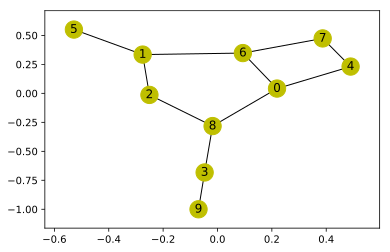

In [5]:
G, layout = nu.compute_nx_graph(graph)

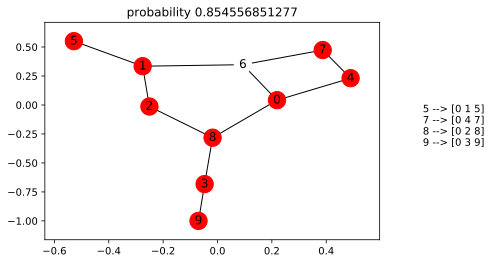

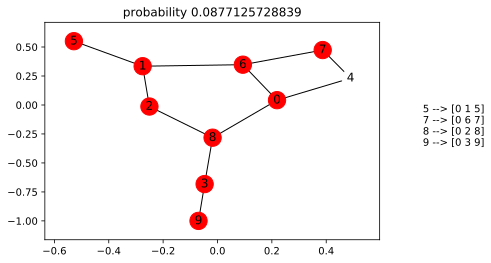

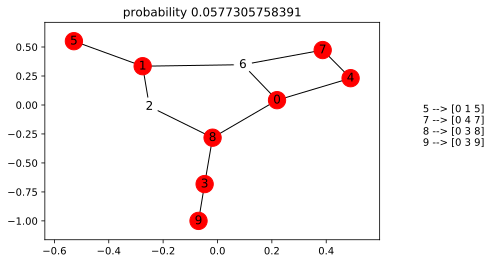

In [6]:
nu.print_srategy_for_n_player(G, 4, result, cov_set, pos=layout)

# Control result for graphs with 10 nodes ix1

In [7]:
graph1 = io.load_graph(10, 3, 25, 1)
result1 = io.load_results(10, 3, 25, 1)
values1 = result1[0]
placements1 = result1[1]
strategies1 = result1[2]
print "values --> " + str(values1)
print "placements --> " + str(placements1)
print "strategies --> " + str(strategies1)

values --> {3: 0.9368380119578283, 4: 1}
placements --> {3: [(1, 1), (2, 7), (3, 8)], 4: [(1, 0), (2, 1), (3, 2), (4, 8)]}
strategies --> {3: [([(1, 3), (2, 2), (3, 0)], 0.085246951327381262), ([(1, 2), (2, 2), (3, 4)], 0.11836428262504096), ([(1, 2), (2, 0), (3, 0)], 0.14758034983666626), ([(1, 2), (2, 2), (3, 2)], 0.13523605631023417), ([(1, 2), (2, 2), (3, 0)], 0.5135723599006774)], 4: [([(1, 0), (2, 2), (3, 0), (4, 0)], 1.0)]}


In [8]:
nu.print_dead_val(graph1)

deadlines: {0: 1, 1: 0, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 2, 8: 0, 9: 3}
values:
0: 0.427983726235
1: 0.136445292906
2: 0.467049910841
3: 0.740929582333
4: 0.223056985636
5: 0.533623713517
6: 0.397047895471
7: 0.62343324191
8: 0.306917116689
9: 0.12298556732


In [9]:
cov_set1 = cv.compute_covering_routes(graph1, graph1.getTargets(), rm_dominated=True)

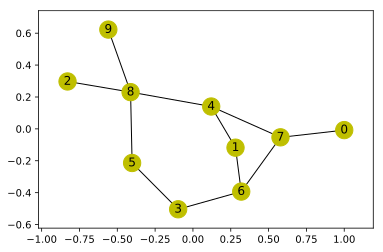

In [10]:
G1, layout1 = nu.compute_nx_graph(graph1)

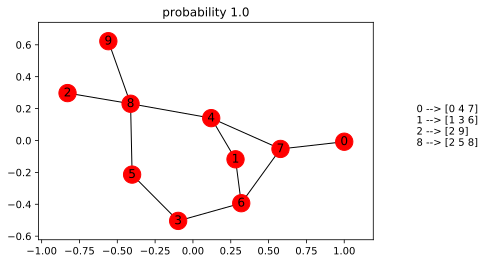

In [11]:
nu.print_srategy_for_n_player(G1, 4, result1, cov_set1, pos=layout1)

# Control result for graphs with 10 nodes ix2

In [12]:
graph2 = io.load_graph(10, 3, 25, 2)
result2 = io.load_results(10, 3, 25, 2)
values2 = result2[0]
placements2 = result2[1]
strategies2 = result2[2]
print "values --> " + str(values2)
print "placements --> " + str(placements2)
print "strategies --> " + str(strategies2)

values --> {4: 1}
placements --> {4: [(1, 0), (2, 2), (3, 7), (4, 9)]}
strategies --> {4: [([(1, 1), (2, 2), (3, 0), (4, 0)], 1.0)]}


In [13]:
nu.print_dead_val(graph2)

deadlines: {0: 0, 1: 3, 2: 3, 3: 2, 4: 2, 5: 2, 6: 3, 7: 0, 8: 2, 9: 0}
values:
0: 0.633008587226
1: 0.0016973247519
2: 0.753017489853
3: 0.563468963411
4: 0.716571535061
5: 0.97758538843
6: 0.275268304071
7: 0.428533836361
8: 0.731891608787
9: 0.514970822341


In [14]:
cov_set2 = cv.compute_covering_routes(graph2, graph2.getTargets(), rm_dominated=True)

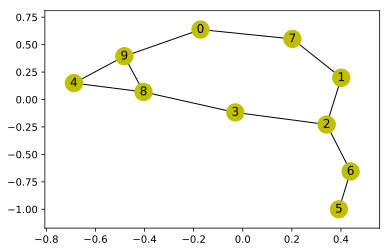

In [15]:
G2, layout2 = nu.compute_nx_graph(graph2)

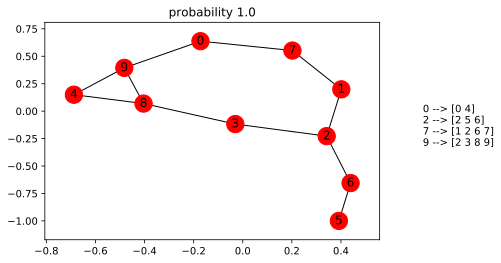

In [17]:
nu.print_srategy_for_n_player(G2, 4, result2, cov_set2, pos=layout2)

# Control result for graphs with 10 nodes ix3

In [18]:
graph3 = io.load_graph(10, 3, 25, 3)
result3 = io.load_results(10, 3, 25, 3)
values3 = result3[0]
placements3 = result3[1]
strategies3 = result3[2]
print "values --> " + str(values3)
print "placements --> " + str(placements3)
print "strategies --> " + str(strategies3)

values --> {3: 0.8901049840204798, 4: 0.9221179364954741, 5: 1}
placements --> {3: [(1, 2), (2, 5), (3, 7)], 4: [(1, 0), (2, 2), (3, 6), (4, 7)], 5: [(1, 4), (2, 5), (3, 6), (4, 8), (5, 9)]}
strategies --> {3: [([(1, 0), (2, 2), (3, 1)], 0.8692218572127236), ([(1, 2), (2, 0), (3, 1)], 0.1307781427872764)], 4: [([(1, 0), (2, 1), (3, 0), (4, 1)], 0.089346597194346164), ([(1, 0), (2, 2), (3, 0), (4, 0)], 0.91065340280565388)], 5: [([(1, 1), (2, 0), (3, 0), (4, 2), (5, 0)], 1.0)]}


In [19]:
nu.print_dead_val(graph3)

deadlines: {0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 2, 6: 1, 7: 1, 8: 2, 9: 3}
values:
0: 0.126429190738
1: 0.871684719398
2: 0.426011828802
3: 0.376996685158
4: 0.0855232773134
5: 0.995519449632
6: 0.840316383436
7: 0.54357572218
8: 0.0707703343253
9: 0.251523528759


In [20]:
cov_set3 = cv.compute_covering_routes(graph3, graph3.getTargets(), rm_dominated=True)

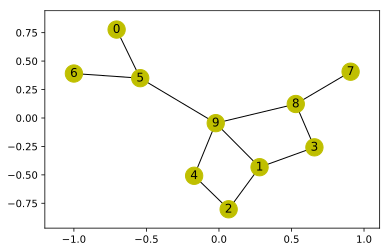

In [21]:
G3, layout3 = nu.compute_nx_graph(graph3)

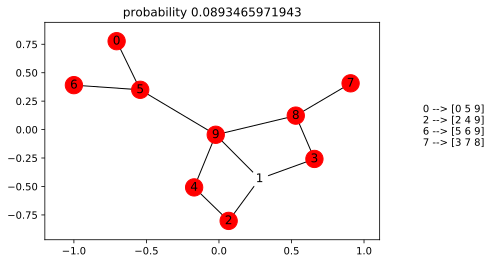

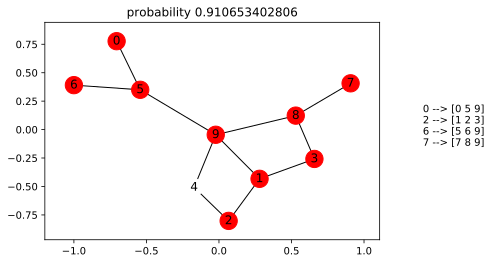

In [22]:
nu.print_srategy_for_n_player(G3, 4, result3, cov_set3, pos=layout3)

# Control result for graphs with 20 nodes ix0

In [23]:
graph4 = io.load_graph(20, 3, 25, 0)
result4 = io.load_results(20, 3, 25, 0)
values4 = result4[0]
placements4 = result4[1]
strategies4 = result4[2]
print "values --> " + str(values4)
print "placements --> " + str(placements4)
print "strategies --> " + str(strategies4)

values --> {7: 1}
placements --> {7: [(1, 2), (2, 4), (3, 12), (4, 13), (5, 14), (6, 17), (7, 19)]}
strategies --> {7: [([(1, 3), (2, 4), (3, 0), (4, 5), (5, 4), (6, 17), (7, 10)], 1.0)]}


In [24]:
nu.print_dead_val(graph4)

deadlines: {0: 3, 1: 1, 2: 0, 3: 2, 4: 3, 5: 2, 6: 3, 7: 1, 8: 1, 9: 2, 10: 3, 11: 3, 12: 0, 13: 3, 14: 0, 15: 1, 16: 2, 17: 0, 18: 2, 19: 0}
values:
0: 0.185040477954
1: 0.0685408145789
2: 0.0220345546394
3: 0.950917999519
4: 0.979823038071
5: 0.00323535806709
6: 0.52176174609
7: 0.887169976492
8: 0.265080650358
9: 0.0642387615807
10: 0.619961410277
11: 0.289496733483
12: 0.486143239309
13: 0.870407154706
14: 0.910039132137
15: 0.295787201441
16: 0.576701300885
17: 0.849756001324
18: 0.158313057145
19: 0.909275864159


In [25]:
cov_set4 = cv.compute_covering_routes(graph4, graph4.getTargets(), rm_dominated=True)

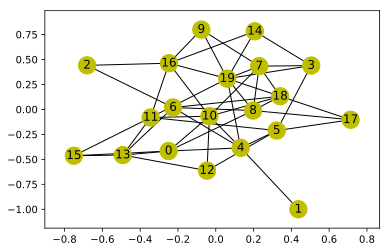

In [27]:
G4, layout4 = nu.compute_nx_graph(graph4)

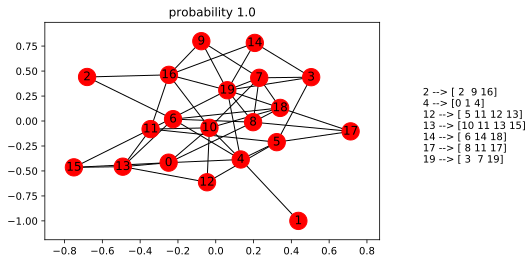

In [28]:
nu.print_srategy_for_n_player(G4, 7, result4, cov_set4, pos=layout4)

In [ ]:
